<a href="https://colab.research.google.com/github/worklifesg/Computer-Vision-Algorithms-and-Projects/blob/main/7-ImageNet%20with%20VGGNet%2C%20ResNet%2C%20Inception%2C%20Xception/Classification_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 align='center'> Classifying images with VGGNet, ResNet, Inception, and Xception </h3>

#### 1. Import Libraries

In [1]:
#Import Libraries

import numpy as np 
import cv2

from tensorflow.keras.applications import ResNet50, InceptionV3, Xception, VGG16,VGG19
from tensorflow.keras.applications import imagenet_utils #to preprocess the images and decode output classifier

from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.preprocessing.image import img_to_array, load_img

from google.colab.patches import cv2_imshow

#### 2. Define dictionary for models

In [2]:
models_func= [VGG16,VGG19,ResNet50,InceptionV3,Xception]

#### 3. Model Preprocessing

In [3]:
for i in range(len(models_func)):
  print('[INFO] loading {}'.format(models_func[i]))
  Network = models_func[i]
  model = Network(weights='imagenet')

[INFO] loading <function VGG16 at 0x7f2dd9ccd2f0>
[INFO] loading <function VGG19 at 0x7f2dd9ccd598>
[INFO] loading <function ResNet50 at 0x7f2dd9cbabf8>
[INFO] loading <function InceptionV3 at 0x7f2dd9d2d048>
[INFO] loading <function Xception at 0x7f2dd9ccd840>


#### 4. Image load

In [4]:
def image_process(image_load,model_name):

  print('[INFO] loading and pre-processing image')
  
  '''
  VGG16,VGG19 and ResNet50 accept input image of size 224x224 while Inception and Xception accepts 299x299
  '''

  if model_name in (InceptionV3,Xception):
    inputShape = (299,299)
    preprocess = preprocess_input
    image = load_img(image_load,target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image,axis=0)
    image = preprocess(image)
  else:
    inputShape = (224,224)
    preprocess = imagenet_utils.preprocess_input
    image = load_img(image_load,target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image,axis=0)
    image = preprocess(image)

  return image

def prediction(model_run,image,image_original):
  print("[INFO] classifying image with '{}'...".format(model_run))
  preds = model_run.predict(image)
  P =imagenet_utils.decode_predictions(preds)

  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
  
  orig = cv2.imread(image_original)

  scale_percent = 50

  width = int(orig.shape[1] * scale_percent / 100)
  height = int(orig.shape[0] * scale_percent / 100)

  dsize = (width,height)

  orig = cv2.resize(orig,dsize)
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
  cv2_imshow(orig)
  cv2.waitKey(0)

#### For soccer ball

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d74025080>'...
1. soccer_ball: 93.43%
2. rugby_ball: 6.06%
3. golf_ball: 0.20%
4. volleyball: 0.17%
5. tennis_ball: 0.05%


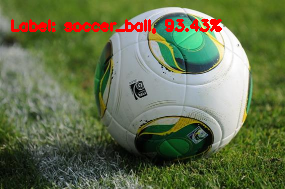

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d74036668>'...
1. soccer_ball: 98.14%
2. rugby_ball: 1.16%
3. golf_ball: 0.42%
4. volleyball: 0.18%
5. croquet_ball: 0.04%


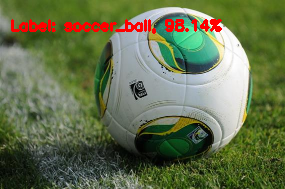

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dc001a2e8>'...
1. soccer_ball: 99.58%
2. rugby_ball: 0.24%
3. volleyball: 0.18%
4. football_helmet: 0.00%
5. croquet_ball: 0.00%


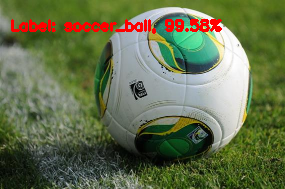

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dcece7b70>'...
1. soccer_ball: 99.95%
2. volleyball: 0.05%
3. rugby_ball: 0.00%
4. sea_urchin: 0.00%
5. silky_terrier: 0.00%


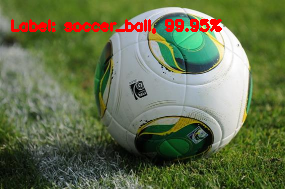

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2e0cf8f0b8>'...
1. soccer_ball: 92.84%
2. volleyball: 2.36%
3. rugby_ball: 0.74%
4. croquet_ball: 0.07%
5. balloon: 0.07%


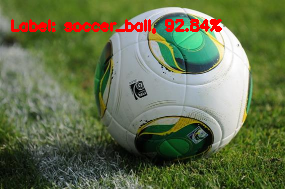

In [5]:
for i in range(len(models_func)):
  network_name = models_func[i]
  model_run = network_name(weights='imagenet')

  image_original = '/content/images/soccer_ball.jpg'

  image = image_process(image_original,network_name)

  prediction(model_run,image,image_original)


#### For BMW

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c4b6f3b70>'...
1. convertible: 98.09%
2. sports_car: 0.63%
3. car_wheel: 0.43%
4. amphibian: 0.19%
5. beach_wagon: 0.18%


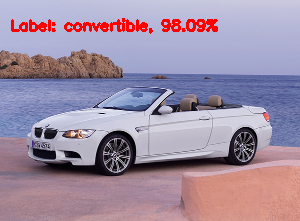

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c4b621e10>'...
1. convertible: 91.76%
2. sports_car: 4.98%
3. limousine: 1.06%
4. car_wheel: 0.75%
5. beach_wagon: 0.41%


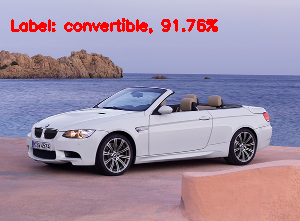

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dd6507be0>'...
1. convertible: 99.22%
2. sports_car: 0.67%
3. car_wheel: 0.08%
4. grille: 0.01%
5. beach_wagon: 0.01%


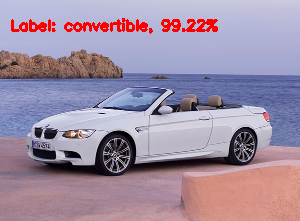

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55cb1390>'...
1. convertible: 94.07%
2. sports_car: 1.09%
3. amphibian: 0.18%
4. space_bar: 0.12%
5. car_wheel: 0.05%


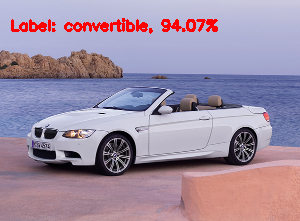

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dd66256d8>'...
1. convertible: 94.89%
2. sports_car: 1.86%
3. amphibian: 0.21%
4. car_wheel: 0.04%
5. speedboat: 0.04%


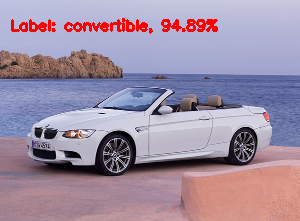

In [6]:
for i in range(len(models_func)):
  network_name = models_func[i]
  model_run = network_name(weights='imagenet')

  image_original = '/content/images/bmw.png'

  image = image_process(image_original,network_name)

  prediction(model_run,image,image_original)


[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55dcb438>'...
1. beagle: 47.89%
2. bluetick: 13.34%
3. quilt: 3.83%
4. bath_towel: 3.74%
5. Chihuahua: 3.28%


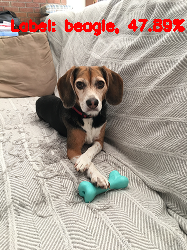

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55b2d978>'...
1. beagle: 60.20%
2. bluetick: 19.01%
3. Chihuahua: 4.51%
4. quilt: 3.22%
5. Border_terrier: 1.97%


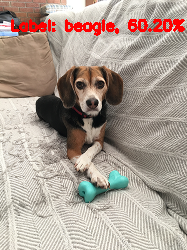

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dd655e5c0>'...
1. beagle: 91.81%
2. bluetick: 6.77%
3. redbone: 0.24%
4. seat_belt: 0.20%
5. Walker_hound: 0.16%


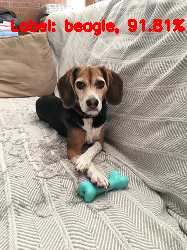

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dd64ffcf8>'...
1. beagle: 94.48%
2. Pembroke: 0.15%
3. Cardigan: 0.15%
4. bluetick: 0.12%
5. quilt: 0.09%


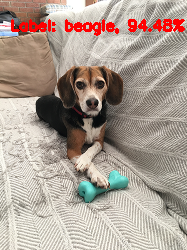

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55b281d0>'...
1. beagle: 97.90%
2. bluetick: 0.46%
3. EntleBucher: 0.06%
4. Walker_hound: 0.04%
5. window_shade: 0.04%


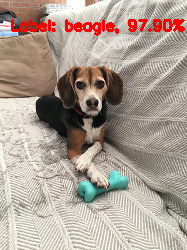

In [7]:
for i in range(len(models_func)):
  network_name = models_func[i]
  model_run = network_name(weights='imagenet')

  image_original = '/content/images/jemma.png'

  image = image_process(image_original,network_name)

  prediction(model_run,image,image_original)


[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55b3fc18>'...
1. studio_couch: 39.29%
2. table_lamp: 25.39%
3. rocking_chair: 5.01%
4. quilt: 2.64%
5. grand_piano: 2.48%


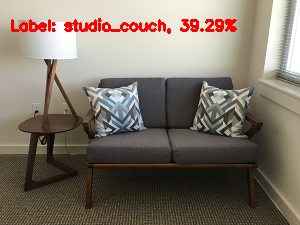

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dd6591be0>'...
1. table_lamp: 43.18%
2. studio_couch: 28.12%
3. pillow: 4.56%
4. home_theater: 3.73%
5. lampshade: 1.81%


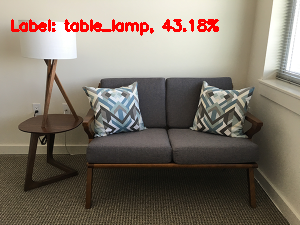

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55c84ef0>'...
1. table_lamp: 68.78%
2. studio_couch: 27.78%
3. window_shade: 1.05%
4. lampshade: 0.59%
5. pillow: 0.39%


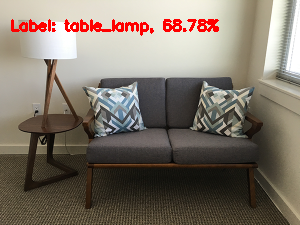

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55a935c0>'...
1. table_lamp: 77.74%
2. studio_couch: 13.15%
3. pillow: 2.36%
4. lampshade: 1.79%
5. window_shade: 0.23%


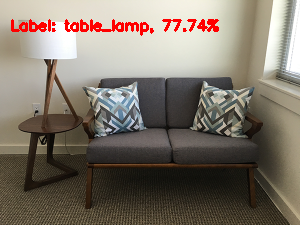

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2dd64b3ac8>'...
1. table_lamp: 69.52%
2. studio_couch: 6.83%
3. lampshade: 5.48%
4. pillow: 5.26%
5. window_shade: 1.57%


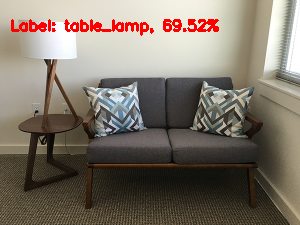

In [8]:
for i in range(len(models_func)):
  network_name = models_func[i]
  model_run = network_name(weights='imagenet')

  image_original = '/content/images/office.png'

  image = image_process(image_original,network_name)

  prediction(model_run,image,image_original)


[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c4b441400>'...
1. home_theater: 72.58%
2. entertainment_center: 8.12%
3. television: 5.53%
4. desktop_computer: 5.06%
5. monitor: 2.58%


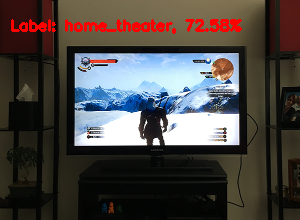

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c4b353320>'...
1. home_theater: 83.74%
2. entertainment_center: 6.78%
3. television: 4.03%
4. monitor: 1.26%
5. loudspeaker: 0.64%


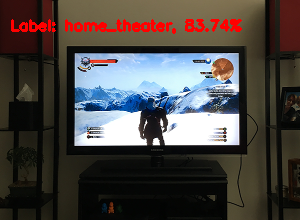

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c4b6956d8>'...
1. home_theater: 92.67%
2. entertainment_center: 5.80%
3. television: 1.18%
4. desktop_computer: 0.13%
5. cinema: 0.07%


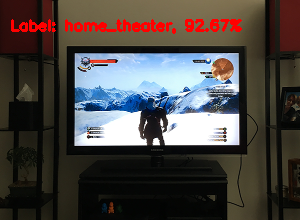

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c4b539780>'...
1. home_theater: 84.36%
2. entertainment_center: 3.62%
3. television: 0.61%
4. loudspeaker: 0.35%
5. monitor: 0.23%


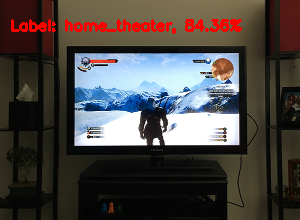

[INFO] loading and pre-processing image
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f2d55c170b8>'...
1. home_theater: 83.67%
2. television: 3.00%
3. entertainment_center: 2.27%
4. cinema: 0.65%
5. projector: 0.56%


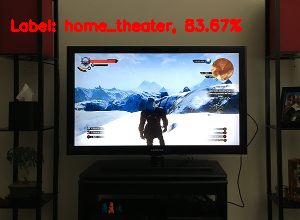

In [9]:
for i in range(len(models_func)):
  network_name = models_func[i]
  model_run = network_name(weights='imagenet')

  image_original = '/content/images/tv.png'

  image = image_process(image_original,network_name)

  prediction(model_run,image,image_original)
